In [88]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.datasets import fashion_mnist
from keras.utils import plot_model, to_categorical
from keras.optimizers import Adam

from sklearn.metrics import confusion_matrix, precision_score, recall_score


import numpy as np
import matplotlib.pyplot as plt

In [89]:
def plot_loss(history, model):
    plt.plot(history.history['loss'], label = "Train")
    plt.plot(history.history['val_loss'], label = "Validation")
    plt.title(f"{model} train and validation loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.savefig(f"./Losses/{model}.png")
    plt.show()
    return

# Data processing

In [90]:
# Load data
(x_train_and_val, y_train_and_val), (x_test, y_test) = fashion_mnist.load_data()

# Normalize data in 0-1 range
x_train_and_val = x_train_and_val / 255.0
y_train_and_val = to_categorical(y_train_and_val)

x_test = x_test / 255.0
y_test = to_categorical(y_test)

# x_train: uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data.

# y_train: uint8 NumPy array of labels (integers in range 0-9) with shape (60000,) for the training data.

# x_test: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data.

# y_test: uint8 NumPy array of labels (integers in range 0-9) with shape (10000,) for the test data.

In [91]:
# building a validation set
train_size = int(x_train_and_val.shape[0] * 0.7)
validation_size = x_train_and_val.shape[0] - train_size

x_validation, y_validation = (x_train_and_val[train_size:], y_train_and_val[train_size:])
x_train, y_train = (x_train_and_val[:train_size], y_train_and_val[:train_size])

# Baseline model
input -> convolutional 16 -> Pooling -> Convolutional 32 -> Pooling -> Fully connected layer 64 -> output

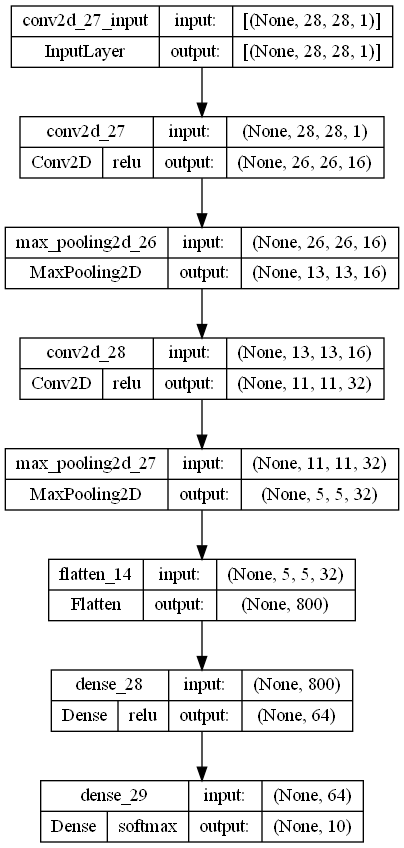

In [92]:
img_width = 28
img_height = 28
num_classes = 10
channels = 1
# Initialize the model
model = Sequential()

# Add a convolutional layer with 32 kernels, 3x3 kernel size, and ReLU activation function
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, channels)))

# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another convolutional layer with 64 kernels, 3x3 kernel size, and ReLU activation function
model.add(Conv2D(32, (3, 3), activation='relu'))

# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output to a 1D array
model.add(Flatten())

# Add a fully connected layer with 128 neurons and ReLU activation function
model.add(Dense(64, activation='relu'))

# Add the output layer with a softmax activation function for multi-class classification
model.add(Dense(num_classes, activation='softmax'))

# Compile the model with categorical cross-entropy loss function and Adam optimizer with a learning rate of 0.001
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print a summary of the model architecture
# model.summary()
plot_model(model, show_shapes=True, show_layer_activations=True, to_file="./Models/baseline_model.png")



In [93]:
history = model.fit(x_train, y_train, validation_data = (x_validation, y_validation), epochs=15)

Epoch 1/15
1313/1313 [==============================] - 22s 15ms/step - loss: 0.5493 - accuracy: 0.8028 - val_loss: 0.4164 - val_accuracy: 0.8560
Epoch 2/15
1313/1313 [==============================] - 19s 14ms/step - loss: 0.3696 - accuracy: 0.8669 - val_loss: 0.3731 - val_accuracy: 0.8679
Epoch 3/15
1313/1313 [==============================] - 17s 13ms/step - loss: 0.3264 - accuracy: 0.8816 - val_loss: 0.3264 - val_accuracy: 0.8844
Epoch 4/15
1313/1313 [==============================] - 18s 13ms/step - loss: 0.2973 - accuracy: 0.8915 - val_loss: 0.2995 - val_accuracy: 0.8925
Epoch 5/15
1313/1313 [==============================] - 17s 13ms/step - loss: 0.2731 - accuracy: 0.9001 - val_loss: 0.2975 - val_accuracy: 0.8926
Epoch 6/15
1313/1313 [==============================] - 17s 13ms/step - loss: 0.2547 - accuracy: 0.9070 - val_loss: 0.2914 - val_accuracy: 0.8927
Epoch 7/15
1313/1313 [==============================] - 17s 13ms/step - loss: 0.2387 - accuracy: 0.9121 - val_loss: 0.3084 -

In [94]:

print('\nValidation accuracy:', history.history['val_accuracy'][-1])

# in depth evaluation
predictions = model.predict(x_validation)

# going back to labels
predictions = np.argmax (predictions, axis = 1)
y_val = np.argmax(y_validation, axis=1)


confusion_matrix(y_val, predictions)

print("Precision: ", precision_score(y_val, predictions, average = 'macro'))
print("Recall: ", recall_score(y_val, predictions, average = 'macro'))


Validation accuracy: 0.9062777757644653
563/563 [==============================] - 2s 3ms/step
Precision:  0.9065136903033295
Recall:  0.9060435368372624


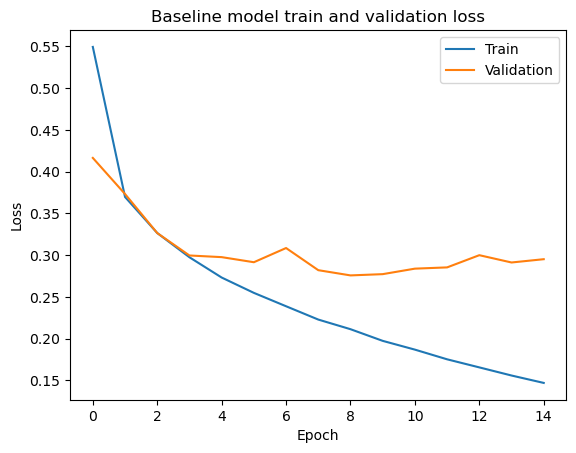

In [95]:
plot_loss(history, "Baseline model")

# Model 2: dropout layer
input -> convolutional 16 -> Pooling -> Convolutional 32 -> Pooling -> Fully connected layer 64 -> Dropout -> output

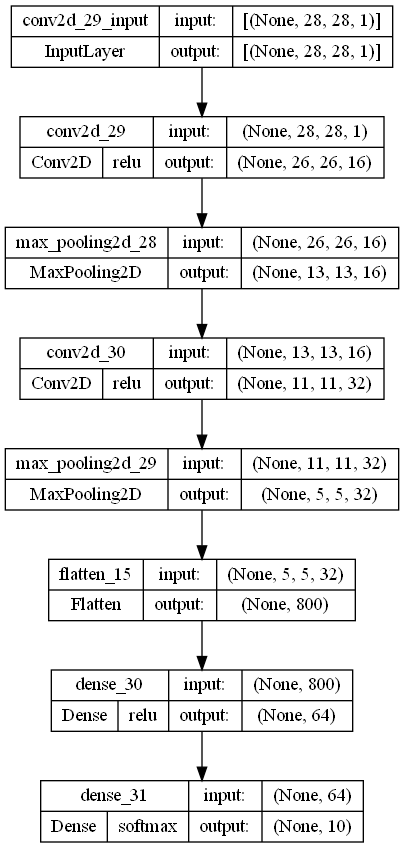

In [96]:


# Initialize the model
model2 = Sequential()

# model.add(Flatten(input_shape=(28, 28)))

# Add a convolutional layer with 32 kernels, 3x3 kernel size, and ReLU activation function
model2.add(Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, channels)))

# Add a max pooling layer with 2x2 pool size
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Add another convolutional layer with 64 kernels, 3x3 kernel size, and ReLU activation function
model2.add(Conv2D(32, (3, 3), activation='relu'))

# Add a max pooling layer with 2x2 pool size
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output to a 1D array
model2.add(Flatten())

# Add a fully connected layer with 128 neurons and ReLU activation function
model2.add(Dense(64, activation='relu'))

# Add a dropout layer with a 0.5 dropout rate
model.add(Dropout(0.3))

# Add the output layer with a softmax activation function for multi-class classification
model2.add(Dense(num_classes, activation='softmax'))

# Compile the model with categorical cross-entropy loss function and Adam optimizer with a learning rate of 0.001
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print a summary of the model architecture
# model.summary()
plot_model(model2, show_shapes=True, show_layer_activations=True, to_file="./Models/model2.png")

In [97]:
history2 = model2.fit(x_train, y_train, validation_data = (x_validation, y_validation), epochs=15)

Epoch 1/15
1313/1313 [==============================] - 15s 11ms/step - loss: 0.5408 - accuracy: 0.8057 - val_loss: 0.3914 - val_accuracy: 0.8592
Epoch 2/15
1313/1313 [==============================] - 14s 11ms/step - loss: 0.3617 - accuracy: 0.8708 - val_loss: 0.3373 - val_accuracy: 0.8798
Epoch 3/15
1313/1313 [==============================] - 14s 11ms/step - loss: 0.3157 - accuracy: 0.8850 - val_loss: 0.3102 - val_accuracy: 0.8887
Epoch 4/15
1313/1313 [==============================] - 15s 11ms/step - loss: 0.2857 - accuracy: 0.8945 - val_loss: 0.3102 - val_accuracy: 0.8884
Epoch 5/15
1313/1313 [==============================] - 14s 11ms/step - loss: 0.2627 - accuracy: 0.9038 - val_loss: 0.2946 - val_accuracy: 0.8923
Epoch 6/15
1313/1313 [==============================] - 14s 11ms/step - loss: 0.2444 - accuracy: 0.9095 - val_loss: 0.2935 - val_accuracy: 0.8928
Epoch 7/15
1313/1313 [==============================] - 14s 10ms/step - loss: 0.2259 - accuracy: 0.9162 - val_loss: 0.2980 -

In [98]:
print('\nValidation accuracy:', history2.history['val_accuracy'][-1])


predictions = model2.predict(x_validation)

# going back to labels
predictions = np.argmax(predictions, axis = 1)
y_val = np.argmax(y_validation, axis=1)


confusion_matrix(y_val, predictions)

print("Precision: ", precision_score(y_val, predictions, average = 'macro'))
print("Recall: ", recall_score(y_val, predictions, average = 'macro'))


Validation accuracy: 0.907444417476654
563/563 [==============================] - 2s 4ms/step
Precision:  0.908086985247469
Recall:  0.9074669011004477


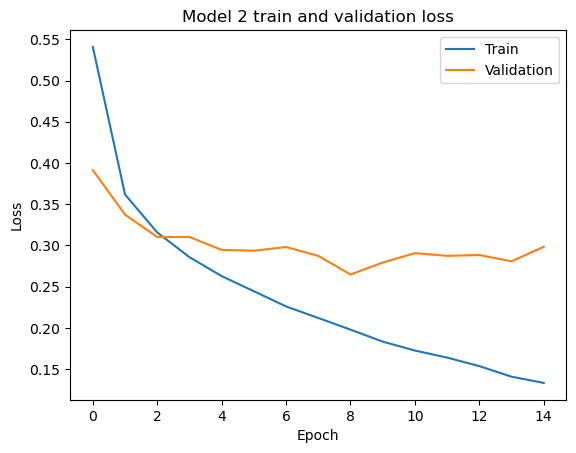

In [99]:
plot_loss(history2, "Model 2")

# Model 3: more neurons in the fully connected layer
input -> convolutional 16 -> Pooling -> Convolutional 32 -> Pooling -> Fully connected layer 128 -> output

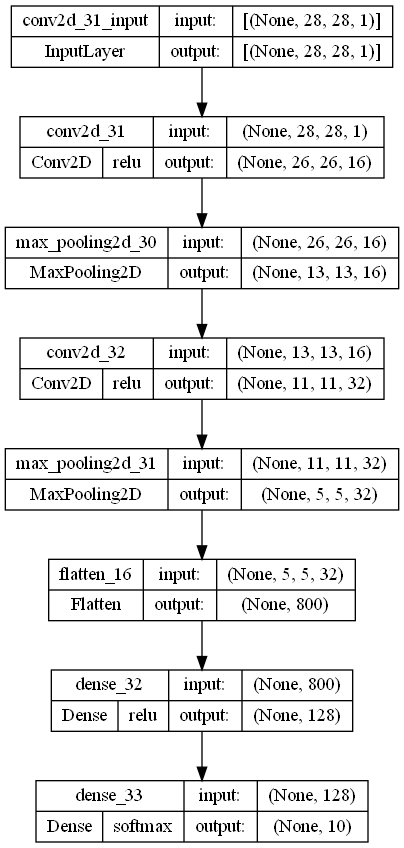

In [100]:
# Initialize the model
model3 = Sequential()

# model.add(Flatten(input_shape=(28, 28)))

# Add a convolutional layer with 32 kernels, 3x3 kernel size, and ReLU activation function
model3.add(Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, channels)))

# Add a max pooling layer with 2x2 pool size
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Add another convolutional layer with 64 kernels, 3x3 kernel size, and ReLU activation function
model3.add(Conv2D(32, (3, 3), activation='relu'))

# Add a max pooling layer with 2x2 pool size
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output to a 1D array
model3.add(Flatten())

# Add a fully connected layer with 128 neurons and ReLU activation function
model3.add(Dense(128, activation='relu'))

# Add the output layer with a softmax activation function for multi-class classification
model3.add(Dense(num_classes, activation='softmax'))

# Compile the model with categorical cross-entropy loss function and Adam optimizer with a learning rate of 0.001
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print a summary of the model architecture
# model.summary()
plot_model(model3, show_shapes=True, show_layer_activations=True, to_file="./Models/model3.png")

In [101]:
history3 = model3.fit(x_train, y_train, validation_data = (x_validation, y_validation), epochs=15)

Epoch 1/15
1313/1313 [==============================] - 16s 11ms/step - loss: 0.5197 - accuracy: 0.8122 - val_loss: 0.3915 - val_accuracy: 0.8577
Epoch 2/15
1313/1313 [==============================] - 15s 11ms/step - loss: 0.3480 - accuracy: 0.8737 - val_loss: 0.3272 - val_accuracy: 0.8826
Epoch 3/15
1313/1313 [==============================] - 14s 11ms/step - loss: 0.3003 - accuracy: 0.8898 - val_loss: 0.2991 - val_accuracy: 0.8903
Epoch 4/15
1313/1313 [==============================] - 14s 11ms/step - loss: 0.2689 - accuracy: 0.9001 - val_loss: 0.2741 - val_accuracy: 0.8998
Epoch 5/15
1313/1313 [==============================] - 14s 11ms/step - loss: 0.2418 - accuracy: 0.9109 - val_loss: 0.2675 - val_accuracy: 0.9023
Epoch 6/15
1313/1313 [==============================] - 15s 11ms/step - loss: 0.2210 - accuracy: 0.9177 - val_loss: 0.2634 - val_accuracy: 0.9051
Epoch 7/15
1313/1313 [==============================] - 15s 11ms/step - loss: 0.2021 - accuracy: 0.9236 - val_loss: 0.2780 -

In [102]:
print('\nValidation accuracy:', history3.history['val_accuracy'][-1])

predictions = model3.predict(x_validation)

# going back to labels
predictions = np.argmax(predictions, axis = 1)
y_val = np.argmax(y_validation, axis=1)


confusion_matrix(y_val, predictions)

print("Precision: ", precision_score(y_val, predictions, average = 'macro'))
print("Recall: ", recall_score(y_val, predictions, average = 'macro'))


Validation accuracy: 0.910111129283905
563/563 [==============================] - 2s 4ms/step
Precision:  0.9119676186118971
Recall:  0.9103169193747596


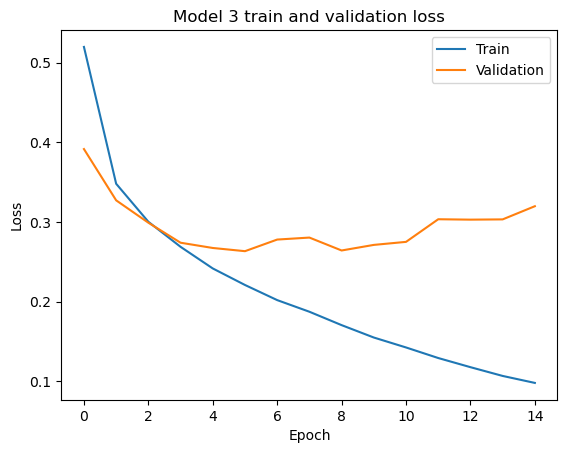

In [103]:
plot_loss(history3, "Model 3")

# Model 4: Batch Normalization
input -> convolutional 16 -> BatchNormalization -> Pooling -> Convolutional 32 -> Pooling -> Fully connected layer 64 -> output

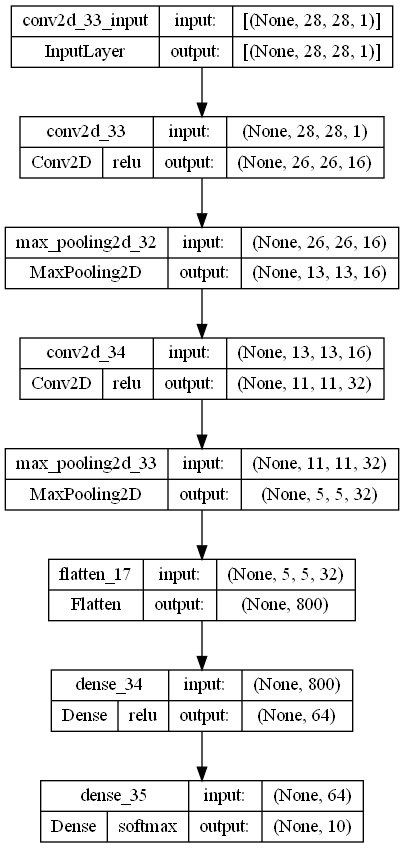

In [104]:
# Initialize the model
model4 = Sequential()

# model.add(Flatten(input_shape=(28, 28)))

# Add a convolutional layer with 32 kernels, 3x3 kernel size, and ReLU activation function
model4.add(Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, channels)))

# Add BatchNormalization
model.add(BatchNormalization())

# Add a max pooling layer with 2x2 pool size
model4.add(MaxPooling2D(pool_size=(2, 2)))

# Add another convolutional layer with 64 kernels, 3x3 kernel size, and ReLU activation function
model4.add(Conv2D(32, (3, 3), activation='relu'))

# Add a max pooling layer with 2x2 pool size
model4.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output to a 1D array
model4.add(Flatten())

# Add a fully connected layer with 128 neurons and ReLU activation function
model4.add(Dense(64, activation='relu'))

# Add the output layer with a softmax activation function for multi-class classification
model4.add(Dense(num_classes, activation='softmax'))

# Compile the model with categorical cross-entropy loss function and Adam optimizer with a learning rate of 0.001
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print a summary of the model architecture
# model.summary()
plot_model(model4, show_shapes=True, show_layer_activations=True, to_file="./Models/model4.png")

In [105]:
history4 = model4.fit(x_train, y_train, validation_data = (x_validation, y_validation), epochs=15)

Epoch 1/15
1313/1313 [==============================] - 15s 11ms/step - loss: 0.5561 - accuracy: 0.7962 - val_loss: 0.4044 - val_accuracy: 0.8547
Epoch 2/15
1313/1313 [==============================] - 14s 10ms/step - loss: 0.3730 - accuracy: 0.8638 - val_loss: 0.3598 - val_accuracy: 0.8685
Epoch 3/15
1313/1313 [==============================] - 14s 10ms/step - loss: 0.3271 - accuracy: 0.8803 - val_loss: 0.3252 - val_accuracy: 0.8814
Epoch 4/15
1313/1313 [==============================] - 14s 11ms/step - loss: 0.2934 - accuracy: 0.8927 - val_loss: 0.3084 - val_accuracy: 0.8870
Epoch 5/15
1313/1313 [==============================] - 14s 11ms/step - loss: 0.2699 - accuracy: 0.9007 - val_loss: 0.2978 - val_accuracy: 0.8911
Epoch 6/15
1313/1313 [==============================] - 14s 11ms/step - loss: 0.2468 - accuracy: 0.9086 - val_loss: 0.3065 - val_accuracy: 0.8884
Epoch 7/15
1313/1313 [==============================] - 14s 11ms/step - loss: 0.2312 - accuracy: 0.9148 - val_loss: 0.2935 -

In [106]:
print('\nValidation accuracy:', history4.history['val_accuracy'][-1])

predictions = model4.predict(x_validation)

# going back to labels
predictions = np.argmax(predictions, axis = 1)
y_val = np.argmax(y_validation, axis=1)


confusion_matrix(y_val, predictions)

print("Precision: ", precision_score(y_val, predictions, average = 'macro'))
print("Recall: ", recall_score(y_val, predictions, average = 'macro'))


Validation accuracy: 0.9094444513320923
563/563 [==============================] - 2s 4ms/step
Precision:  0.9095760365458583
Recall:  0.9092549450250862


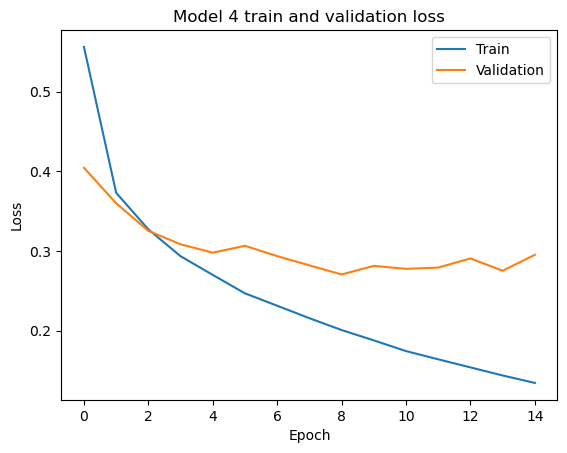

In [107]:
plot_loss(history4, "Model 4")

# Model 5: Higher Learning rate
input -> convolutional 16 -> Pooling -> Convolutional 32 -> Pooling -> Fully connected layer 64 -> output

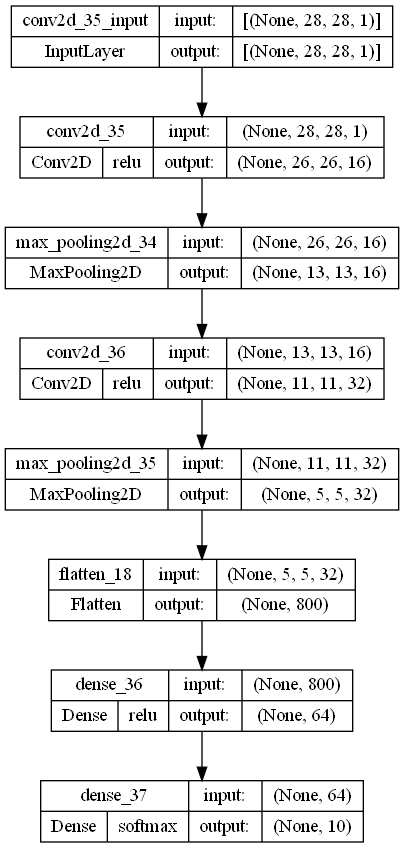

In [108]:
# Initialize the model
model5 = Sequential()

# model.add(Flatten(input_shape=(28, 28)))

# Add a convolutional layer with 32 kernels, 3x3 kernel size, and ReLU activation function
model5.add(Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, channels)))

# Add BatchNormalization
model.add(BatchNormalization())

# Add a max pooling layer with 2x2 pool size
model5.add(MaxPooling2D(pool_size=(2, 2)))

# Add another convolutional layer with 64 kernels, 3x3 kernel size, and ReLU activation function
model5.add(Conv2D(32, (3, 3), activation='relu'))

# Add a max pooling layer with 2x2 pool size
model5.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output to a 1D array
model5.add(Flatten())

# Add a fully connected layer with 128 neurons and ReLU activation function
model5.add(Dense(64, activation='relu'))

# Add the output layer with a softmax activation function for multi-class classification
model5.add(Dense(num_classes, activation='softmax'))

# Compile the model with categorical cross-entropy loss function and Adam optimizer with a learning rate of 0.01, default is 0.001
model5.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate = 0.01), metrics=['accuracy'])

# Print a summary of the model architecture
# model.summary()
plot_model(model5, show_shapes=True, show_layer_activations=True, to_file="./Models/model5.png")

In [109]:
history5 = model5.fit(x_train, y_train, validation_data = (x_validation, y_validation), epochs=15)

Epoch 1/15
1313/1313 [==============================] - 18s 13ms/step - loss: 0.4814 - accuracy: 0.8225 - val_loss: 0.3746 - val_accuracy: 0.8632
Epoch 2/15
1313/1313 [==============================] - 16s 12ms/step - loss: 0.3652 - accuracy: 0.8640 - val_loss: 0.3783 - val_accuracy: 0.8613
Epoch 3/15
1313/1313 [==============================] - 16s 13ms/step - loss: 0.3419 - accuracy: 0.8723 - val_loss: 0.3714 - val_accuracy: 0.8606
Epoch 4/15
1313/1313 [==============================] - 15s 12ms/step - loss: 0.3276 - accuracy: 0.8793 - val_loss: 0.3519 - val_accuracy: 0.8736
Epoch 5/15
1313/1313 [==============================] - 15s 11ms/step - loss: 0.3112 - accuracy: 0.8857 - val_loss: 0.3459 - val_accuracy: 0.8766
Epoch 6/15
1313/1313 [==============================] - 17s 13ms/step - loss: 0.3069 - accuracy: 0.8859 - val_loss: 0.3926 - val_accuracy: 0.8637
Epoch 7/15
1313/1313 [==============================] - 16s 12ms/step - loss: 0.3047 - accuracy: 0.8868 - val_loss: 0.3747 -

In [110]:
print('\nValidation accuracy:', history5.history['val_accuracy'][-1])

predictions = model5.predict(x_validation)

# going back to labels
predictions = np.argmax(predictions, axis = 1)
y_val = np.argmax(y_validation, axis=1)


confusion_matrix(y_val, predictions)

print("Precision: ", precision_score(y_val, predictions, average = 'macro'))
print("Recall: ", recall_score(y_val, predictions, average = 'macro'))


Validation accuracy: 0.8725555539131165
563/563 [==============================] - 2s 4ms/step
Precision:  0.8740100903090567
Recall:  0.872603625649236


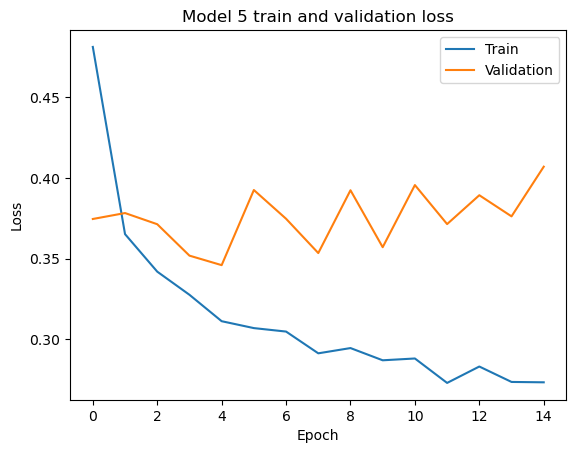

In [111]:
plot_loss(history5, "Model 5")

In [112]:
# testing

# test_loss, test_acc = model.evaluate(x_validation,  y_validation, verbose=2)

# print('\nTest accuracy:', test_acc)

# # in depth evaluation
# predictions = model.predict(x_validation)

# # going back to labels
# predictions = np.argmax (predictions, axis = 1)
# y_val = np.argmax(y_validation, axis=1)


# confusion_matrix(y_val, predictions)

# print("Precision: ", precision_score(y_val, predictions, average = 'macro'))
# print("Recall: ", recall_score(y_val, predictions, average = 'macro'))